<a href="https://colab.research.google.com/github/OlyaSto/Olyabmstu/blob/master/%D0%A2%D0%9C%D0%9E/%D0%9B%D0%A04/LR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа №4

Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели: 
*   одну из линейных моделей (линейную или полиномиальную регрессию при решении
задачи регрессии, логистическую регрессию при решении задачи классификации);
*   SVM;
*  дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

## Загрузка данных

Монтирование Google Drive для получения доступа к данным, лежащим на нем:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных:

In [3]:
filename = '/content/drive/MyDrive/ford.csv'

In [4]:
df = pd.read_csv(filename, sep=',')

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


В качестве датасета будем использовать набор данных, содержащий данные для прогназирования цен на разные модели машин марки Ford.
https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

Датасет содержит следующие атрибуты:
1. model - > Ford Car Brands - Модели машин марки Ford
2. year - >Production Year - Год выпуска
3. price - >Price of car in $ - Цена машины в долларах
4. transmission - > Automatic,Manual, Semi-Auto - Тип коробки передач: автоматическая, ручная, полуавтоматическая
5. mileage -> Number of miles traveled - Количество пройденных миль
6. fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other - Тип топлива: бензин, дизель, гибрид, электричество, другое
7. tax -> Annual Tax - Ежегодный налог
8. mpg - > Miles per Gallon - Милли на галон
9. engineSize - > Car's Engine Size - Размер двигателя автомобиля

In [6]:
df.shape

(17966, 9)

Типы данных

In [8]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

## Обработка данных


Кодирование категориальных признаков

Категориальные данные находятся в столбцах "model", "fuelType", "transmission".
Для кодирования этих столбцов будем использовать LabelEncoder:

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
#model
lemanum = LabelEncoder()
lemanumarr = lemanum.fit_transform(df["model"])
df["model"] = lemanumarr
df = df.astype({"model":"float"})

#transmission
lemot = LabelEncoder()
lemotarr = lemot.fit_transform(df["transmission"])
df["transmission"] = lemotarr
df = df.astype({"transmission":"float"})

#fuelType
lemof = LabelEncoder()
lemofarr = lemof.fit_transform(df["fuelType"])
df["fuelType"] = lemofarr
df = df.astype({"fuelType":"float"})

Выведем новые уникальные значения

In [13]:
np.unique(lemanumarr), np.unique(lemotarr), np.unique(lemofarr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), array([0, 1, 2]), array([0, 1, 2, 3, 4]))

Выведем обновленную таблицу

In [14]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5.0,2017,12000,0.0,15944,4.0,150,57.7,1.0
1,6.0,2018,14000,1.0,9083,4.0,150,57.7,1.0
2,6.0,2017,13000,1.0,12456,4.0,150,57.7,1.0
3,5.0,2019,17500,1.0,10460,4.0,145,40.3,1.5
4,5.0,2019,16500,0.0,1482,4.0,145,48.7,1.0


## Разделение выборки на обучающую и тестовую

Разделим выборку с помощью функции train_test_split:

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df, df.price, random_state=1)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13474, 9), (13474,), (4492, 9), (4492,))

### Обучение моделей

## Линейная модель регрессии

### Кореляционная матрица:

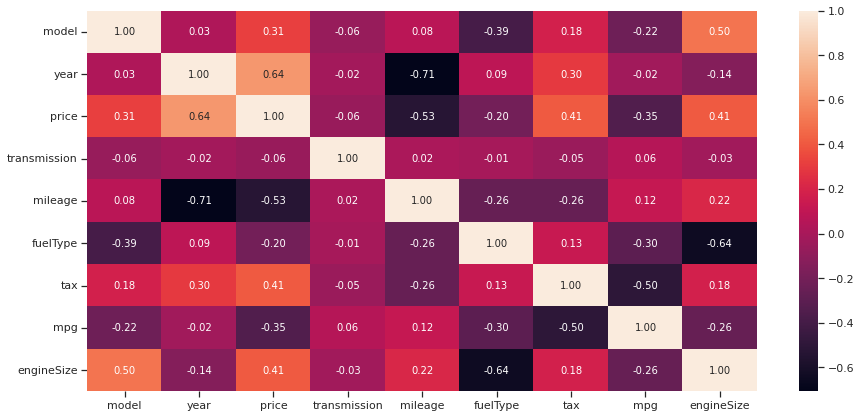

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Наибольший коэффициент корреляции между "price" и "year" - 0,64

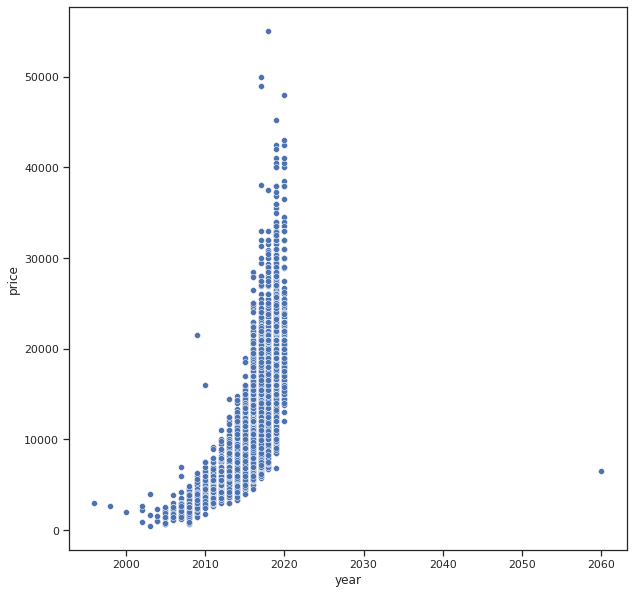

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='year', y='price', data=df)

### Коэффициенты регрессии

In [24]:
from typing import Dict, Tuple

In [25]:
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [28]:
x_array = df['year'].values
y_array = df['price'].values

Найдем коэффициенты регрессии:

In [29]:
b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(-2954033.920168288, 1470.7535174668847)

In [30]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [31]:
regr_a = y_regr(x_array, b0, b1)

### Метод наименьших квадратов

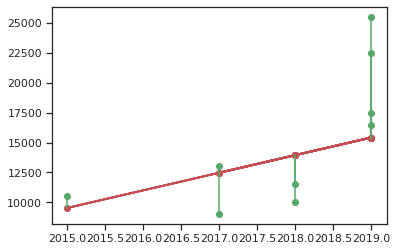

In [34]:
K_mnk=10

plt.plot(x_array[1:K_mnk+1], y_array[1:K_mnk+1], 'go')
plt.plot(x_array[1:K_mnk+1], regr_a[1:K_mnk+1], '-ro', linewidth=2.0)

for i in range(len(x_array[1:K_mnk+1])):
    x1 = x_array[1:K_mnk+1][i]
    y1 = y_array[1:K_mnk+1][i]
    y2 = regr_a[1:K_mnk+1][i]
    plt.plot([x1,x1],[y1,y2],'g-')

plt.show()

Зеленые отрезки - ошибки между истинными и предсказанными значениями.

### Подбор коэффициентов через LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression


Коэффициенты, полученные с использованием LinearRegression:

In [36]:
regr1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, regr1.coef_), (b0, regr1.intercept_)

((1470.7535174668847, array([[1470.75351747]])),
 (-2954033.920168288, array([-2954033.92016829])))

Линейная модель:

In [37]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

## SVM модель


Будем использовать класс SVR для решения задачи регрессии методом опорных векторов:

In [53]:
from sklearn.svm import SVR
from sklearn.datasets import make_blobs


Модель SVM:

In [45]:
regr4 = SVR(kernel='linear', C=1.0)
model4 = regr4.fit(X_train, y_train)


## Дерево решений

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
def stat_tree(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("Всего узлов:", n_nodes)
    print("Листовых узлов:", sum(is_leaves))
    print("Глубина дерева:", max(node_depth))
    print("Минимальная глубина листьев дерева:", min(node_depth[is_leaves]))
    print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

Построим модель дерева с глубиной = 3:

In [49]:
regr5 = DecisionTreeRegressor(max_depth=3)
model5 = regr5.fit(X_train, y_train)


Выведем основную статистику для дерева:

In [50]:
stat_tree(model5)

Всего узлов: 15
Листовых узлов: 8
Глубина дерева: 3
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 3.0


Построим модель дерева с глубиной = 5:

In [51]:
regr6 = DecisionTreeRegressor(max_depth=5)
model6 = regr6.fit(X_train, y_train)

In [57]:
stat_tree(model6)

Всего узлов: 63
Листовых узлов: 32
Глубина дерева: 5
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 5.0


## Оценка качества моделей с помощью двух метрик. Сравнение качества.

Оценивать качество регрессии будем при помощи двух метрик - средней абсолютной ошибки (Mean Absolute Error) и медианной абсолютной ошибки (Median Absolute Error):

In [58]:
from sklearn.metrics import mean_absolute_error, median_absolute_error 

In [59]:
err1 = []
err2 = []

Функция для оценивания:

In [60]:
def rate_model(model):
    print("Средняя абсолютная ошибка:",
          mean_absolute_error(y_test, model.predict(X_test)))
    err1.append(mean_absolute_error(y_test, model.predict(X_test)))
    print("Медианная абсолютная ошибка:",
          median_absolute_error(y_test, model.predict(X_test)))
    err2.append(median_absolute_error(y_test, model.predict(X_test)))

In [61]:
rate_model(model1)

Средняя абсолютная ошибка: 5.998220817831354e-12
Медианная абсолютная ошибка: 5.4569682106375694e-12


In [62]:
rate_model(model4)

Средняя абсолютная ошибка: 0.036986368835288864
Медианная абсолютная ошибка: 0.03734237749267777


In [63]:
rate_model(model5)

Средняя абсолютная ошибка: 771.6319101516356
Медианная абсолютная ошибка: 680.5265086321469


In [64]:
rate_model(model6)

Средняя абсолютная ошибка: 190.73332747554798
Медианная абсолютная ошибка: 154.2515723270444


Самая лучшая по качеству по обоим метрикам - первая модель, полученная при помощи LinearRegression, а худшая - Дерево решений с глубиной 5.

## График важности признаков в дереве решений

In [65]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

Проверим для модели с глубиной = 3:

In [67]:
list(zip(df.columns.values, model5.feature_importances_))

[('model', 0.0),
 ('year', 0.0),
 ('price', 1.0),
 ('transmission', 0.0),
 ('mileage', 0.0),
 ('fuelType', 0.0),
 ('tax', 0.0),
 ('mpg', 0.0),
 ('engineSize', 0.0)]

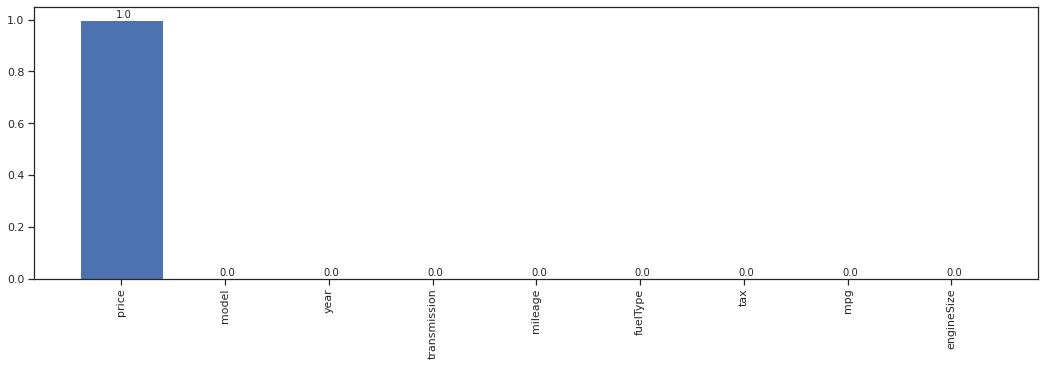

In [69]:
car_tree_cl_fl_1, car_tree_cl_fd_1 = draw_feature_importances(model5, df)

In [73]:
list(zip(df.columns.values, model6.feature_importances_))

[('model', 0.0),
 ('year', 0.0),
 ('price', 1.0),
 ('transmission', 0.0),
 ('mileage', 0.0),
 ('fuelType', 0.0),
 ('tax', 0.0),
 ('mpg', 0.0),
 ('engineSize', 0.0)]

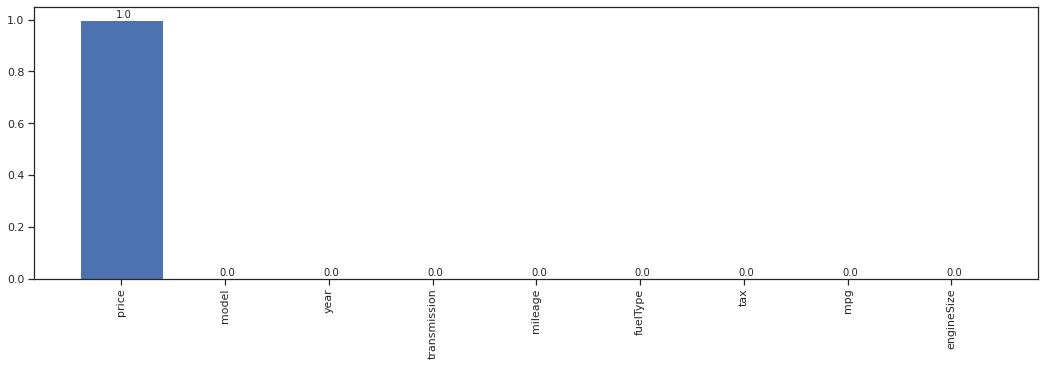

In [75]:
car_tree_cl_fl_2, car_tree_cl_fd_ = draw_feature_importances(model6, df)

## Правила дерева решений в текстовом виде

In [80]:
#Глубина = 3
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model5, feature_names=list(df.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [81]:
#Глубина = 5
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model6, feature_names=list(df.columns))
HTML('<pre>' + tree_rules + '</pre>')